In [3]:
import tensorflow as tf
from pathlib import Path
import pathlib
from tensorflow.keras.callbacks import TensorBoard
tf.enable_eager_execution()

EPOCHS = 10
NUM_CLASSES = 200
BATCH_SIZE = 128
NUM_CORES = 6
IMAGE_SHAPE = (64, 64, 3)
TRANSFORMED_IMAGE_SHAPE = (64, 64, 3)

In [4]:
data_root = Path('E:/data/tiny-imagenet-200/tiny-imagenet-200')

In [5]:
train_image_paths = list(data_root.glob('train/*/*/*'))
train_image_paths = [str(path) for path in train_image_paths]
image_count = len(train_image_paths)
print(f"training images: {image_count}")

test_image_paths = list(data_root.glob('test/images/*'))
test_image_paths = [str(path) for path in test_image_paths]
image_count = len(test_image_paths)
print(f"test images: {image_count}")

val_image_paths = list(data_root.glob('val/images/*'))
val_image_paths = [str(path) for path in val_image_paths]
image_count = len(val_image_paths)
print(f"val images: {image_count}")

# print(train_image_paths[:3])
print(val_image_paths[:5])

training images: 100000
test images: 10000
val images: 10000
['E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_0.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_1.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_10.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_100.JPEG', 'E:\\data\\tiny-imagenet-200\\tiny-imagenet-200\\val\\images\\val_1000.JPEG']


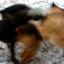

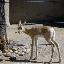

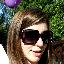

In [6]:
import IPython.display as display
import random
    
for n in range(3):
  image_path = random.choice(val_image_paths)
  display.display(display.Image(image_path))
  print()

In [7]:
label_names = sorted(item.name for item in data_root.glob('train/*/') if item.is_dir())
label_names[0:5]

['n01443537', 'n01629819', 'n01641577', 'n01644900', 'n01698640']

In [8]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n01443537': 0,
 'n01629819': 1,
 'n01641577': 2,
 'n01644900': 3,
 'n01698640': 4,
 'n01742172': 5,
 'n01768244': 6,
 'n01770393': 7,
 'n01774384': 8,
 'n01774750': 9,
 'n01784675': 10,
 'n01855672': 11,
 'n01882714': 12,
 'n01910747': 13,
 'n01917289': 14,
 'n01944390': 15,
 'n01945685': 16,
 'n01950731': 17,
 'n01983481': 18,
 'n01984695': 19,
 'n02002724': 20,
 'n02056570': 21,
 'n02058221': 22,
 'n02074367': 23,
 'n02085620': 24,
 'n02094433': 25,
 'n02099601': 26,
 'n02099712': 27,
 'n02106662': 28,
 'n02113799': 29,
 'n02123045': 30,
 'n02123394': 31,
 'n02124075': 32,
 'n02125311': 33,
 'n02129165': 34,
 'n02132136': 35,
 'n02165456': 36,
 'n02190166': 37,
 'n02206856': 38,
 'n02226429': 39,
 'n02231487': 40,
 'n02233338': 41,
 'n02236044': 42,
 'n02268443': 43,
 'n02279972': 44,
 'n02281406': 45,
 'n02321529': 46,
 'n02364673': 47,
 'n02395406': 48,
 'n02403003': 49,
 'n02410509': 50,
 'n02415577': 51,
 'n02423022': 52,
 'n02437312': 53,
 'n02480495': 54,
 'n02481823': 55,
 '

In [9]:
train_image_labels = [label_to_index[pathlib.Path(path).parent.parent.name]
                    for path in train_image_paths]
print(train_image_labels[0:10])
print(train_image_labels[1000:1010])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
import csv
import os
with open('E:/data/tiny-imagenet-200/tiny-imagenet-200/val/val_annotations.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter='\t')
    val_image_to_label = {} 
    for row in readCSV:
        val_image_to_label[row[0]] = row[1]
val_image_labels = []
for p in val_image_paths:
    p = os.path.basename(p)
    val_image_labels.append(label_to_index[val_image_to_label[p]])
val_image_labels

[107,
 139,
 158,
 90,
 138,
 67,
 135,
 198,
 38,
 88,
 63,
 107,
 107,
 11,
 42,
 51,
 23,
 167,
 78,
 195,
 134,
 162,
 27,
 170,
 197,
 38,
 71,
 35,
 69,
 51,
 83,
 104,
 192,
 35,
 97,
 80,
 130,
 116,
 20,
 52,
 135,
 165,
 33,
 68,
 99,
 17,
 166,
 110,
 175,
 175,
 192,
 139,
 101,
 39,
 40,
 93,
 127,
 35,
 36,
 18,
 167,
 11,
 13,
 1,
 159,
 5,
 169,
 104,
 164,
 194,
 134,
 32,
 35,
 190,
 5,
 53,
 104,
 186,
 35,
 46,
 118,
 165,
 153,
 114,
 21,
 132,
 52,
 88,
 123,
 99,
 14,
 32,
 126,
 93,
 196,
 12,
 44,
 48,
 13,
 192,
 6,
 189,
 151,
 72,
 104,
 174,
 196,
 192,
 84,
 183,
 145,
 147,
 102,
 188,
 174,
 56,
 120,
 126,
 46,
 89,
 180,
 196,
 5,
 171,
 53,
 67,
 188,
 75,
 186,
 10,
 52,
 66,
 196,
 76,
 105,
 197,
 109,
 20,
 75,
 190,
 22,
 8,
 93,
 12,
 9,
 160,
 73,
 172,
 59,
 72,
 129,
 174,
 7,
 130,
 129,
 152,
 109,
 68,
 138,
 27,
 5,
 47,
 79,
 2,
 160,
 95,
 18,
 60,
 158,
 53,
 91,
 108,
 161,
 85,
 147,
 134,
 44,
 102,
 53,
 191,
 57,
 114,
 136,
 102,

In [11]:
img_path = train_image_paths[2]
val_img_path = val_image_paths[2]
print(img_path)
print(val_img_path)

E:\data\tiny-imagenet-200\tiny-imagenet-200\train\n01443537\images\n01443537_10.JPEG
E:\data\tiny-imagenet-200\tiny-imagenet-200\val\images\val_10.JPEG


In [12]:
import matplotlib.pyplot as plt

image_path = train_image_paths[0]
val_image_path = val_image_paths[0]

label = train_image_labels[0]
val_label = val_image_labels[0]

# plt.imshow(load_and_preprocess_image(val_img_path))
# plt.grid(False)
# plt.title(val_label)
# print()

In [13]:
import random

def data_gen(image_paths, labels, is_training, batch_size=128):

    def preprocess_fn(filepath, label):
        x = tf.read_file(filepath)
        x = tf.image.decode_jpeg(x, channels=3)
        x = tf.reshape(tf.cast(x, tf.float32), IMAGE_SHAPE)
        if random.choice([0,1]):
            tf.image.flip_left_right(x)
        x /= 255.0
        y = tf.one_hot(tf.cast(label, tf.uint8), NUM_CLASSES)
        return x, y

    ds = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    if is_training:
        ds = ds.shuffle(10000)
        
    ds = ds.apply(tf.data.experimental.map_and_batch(
        preprocess_fn, batch_size,
        num_parallel_batches=NUM_CORES,
        drop_remainder=True if is_training else False))
    ds = ds.repeat()
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    
    return ds

def read_images(image_paths):
    images = [tf.image.decode_jpeg(tf.read_file(image_path), 3) for image_path in image_paths]
    return images

In [14]:
train_ds = data_gen(train_image_paths, train_image_labels, is_training=True, batch_size=BATCH_SIZE)
val_ds = data_gen(val_image_paths, val_image_labels, is_training=False, batch_size=BATCH_SIZE)

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
print('shape: ', repr(val_ds.output_shapes))
print('type: ', val_ds.output_types)
print()
print(val_ds)

print('shape: ', repr(train_ds.output_shapes))
print('type: ', train_ds.output_types)
print()
print(train_ds)

shape:  (TensorShape([Dimension(None), Dimension(64), Dimension(64), Dimension(3)]), TensorShape([Dimension(None), Dimension(200)]))
type:  (tf.float32, tf.float32)

<DatasetV1Adapter shapes: ((?, 64, 64, 3), (?, 200)), types: (tf.float32, tf.float32)>
shape:  (TensorShape([Dimension(128), Dimension(64), Dimension(64), Dimension(3)]), TensorShape([Dimension(128), Dimension(200)]))
type:  (tf.float32, tf.float32)

<DatasetV1Adapter shapes: ((128, 64, 64, 3), (128, 200)), types: (tf.float32, tf.float32)>


In [16]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8,8))
# for n,image in enumerate(train_ds.take(4)):
#   plt.subplot(2,2,n+1)
#   plt.imshow(image)
#   plt.grid(False)
#   plt.xticks([])
#   plt.yticks([])

In [17]:
from resnet34 import resnet34

In [18]:
def visualize_training(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Training Visualization')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [19]:
model = resnet34(input_shape=TRANSFORMED_IMAGE_SHAPE, initial_downsample=False,
                 num_classes=NUM_CLASSES)
# model = net()
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

In [20]:
len(val_image_paths)

10000

In [21]:
from time import time
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

history = model.fit(
        train_ds.make_one_shot_iterator(),
        steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds.make_one_shot_iterator(),
        validation_steps=len(val_image_paths) // BATCH_SIZE,
        callbacks=[tensorboard])

# history = model.fit(
#         train_ds.make_one_shot_iterator(),
#         steps_per_epoch=len(train_image_paths) // BATCH_SIZE,
#         epochs=EPOCHS)

visualize_training(history)

Epoch 1/10
Instructions for updating:
Use tf.cast instead.
 27/781 [>.............................] - ETA: 20:20 - loss: 3.9076 - acc: 0.0819

KeyboardInterrupt: 

In [ ]:
# model.save('tiny_with_image_flip.h5', overwrite=True)